# Capstone Project 1

## Background

One of the most debatable questions in the field of Finance is whether it is an Art or Science. We have heard of many individuals who become millionaire from the stock market. Some argue that they are “able to tell” which stocks would increase in value (Art) while others insist that the stock market is purely numbers based calculation (Science). 

Since I myself are not one of those people that can predict the movement of the stock prices, I would use Science to predict the movement using different statistical approaches. This project will aim to create an algorithm that will predict the stock price.

There are different ways to predict the stock prices such as:
- Moving Average
- Linear Regression
- Auto ARIMA
- Prophet
- Long Short Term Memory (LSTM)
	
From the statistical method above, I would like to test which one is able to predict the best movement by comparing it day-per-day once the algorithm is done for 3 months while feeding the news to the algorithm as well.

## Data Source

Mainly the data source that I will be using is from Alpha Vantage and the companies that I will test my hypothesis will come from 3 different industries:
1. Broadcasting & Entertainment - Disney (DIS)
2. Information Technology - Apple (AAPL)
3. Managed Health Care - United Health Group (UNH)

## Process

In [29]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from alpha_vantage.timeseries import TimeSeries

In [30]:
# Declaring the API Key

av_api_key = 'VBBSHCG7I18DDPJV'
twitter_api_key = 'jzu3E5CJbVcjziMmJhpMfwBjx'

In [31]:
# Use the TimeSeries to declare the API key and output format to pandas

ts = TimeSeries(key=av_api_key,output_format='pandas')

In [32]:
# Pull the Dow Jones Industrial standard to check the data

dji_data, metadata = ts.get_daily(symbol="DJI", outputsize='full')
dji_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5001.000000,5001.000000,5001.000000,5001.000000,5.001000e+03
mean,13953.650210,14034.047748,13869.990162,13956.294773,2.189522e+08
std,5096.974493,5106.451513,5086.377860,5097.832960,1.031571e+08
min,6547.009800,6709.609900,6469.950200,6547.049800,8.410000e+06
25%,10411.150400,10476.730500,10350.889600,10412.820300,1.437200e+08
50%,12084.740200,12149.190400,11999.440400,12083.769500,2.146600e+08
75%,16943.160200,16994.890600,16858.880900,16943.810500,2.727600e+08
max,27843.539100,28004.890600,27843.539100,28004.890600,2.190810e+09


In [33]:
# Check the data types

dji_data.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [34]:
# Check if any missing values in any of the columns

dji_data.isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [35]:
#dji_data.nunique()

In [38]:
# Declare the columns name to be used

columns_name = ['Open', 'High', 'Low', 'Close', 'Volume']

In [39]:
# Create a function to pull the data

def get_data(company_symbol):
    data, metadata = ts.get_daily(symbol = company_symbol, outputsize='full')
    data.columns = columns_name
    return data

### Disney

In [41]:
# Use the function to get the Disney data

dis_data = get_data("DIS")

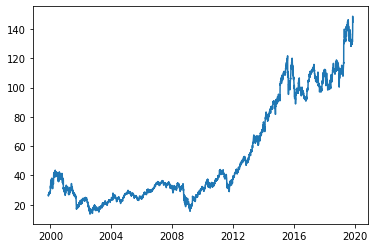

In [43]:
# Plot the 'Close' column to check if there is any irregularities in the data

plt.plot(dis_data.Close)

In [12]:
# Find the starting date, ending date and number of days of data

min_date = min(dis_data.index).date()
max_date = max(dis_data.index).date()
count_date = len(dis_data.index)

In [46]:
# Print the results

print("The earliest date for the data is : " + str(min_date))
print("The latest date for the data is : " + str(max_date))
print("Number of days of transactions : " + str(count_date) + " days")

The earliest date for the data is : 1999-11-16
The latest date for the data is : 2019-11-15
Number of days of transactions : 5033 days


In [48]:
# Check the top stats measure

dis_data.describe()

,Open,High,Low,Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,53.729379,54.211414,53.224770,53.738437,9.200571e+06
std,35.432363,35.607653,35.209727,35.409512,5.489669e+06
min,13.800000,14.100000,13.480000,13.770000,1.487400e+06
25%,27.000000,27.371900,26.730000,27.020000,6.069500e+06
50%,34.910000,35.200000,34.540000,34.938000,7.910400e+06
75%,90.686100,91.150000,90.056600,90.580000,1.074810e+07
max,148.000000,150.630000,146.280000,148.720000,1.165887e+08


In [15]:
# Check for any missing data

dis_data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Apple

In [44]:
# Use the function to get the Apple data

aapl_data = get_data("AAPL")

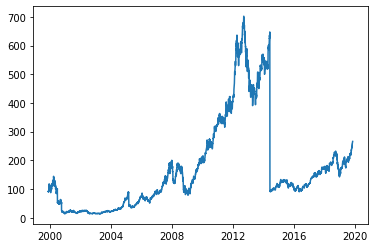

In [45]:
# Plot the 'Close' column to check if there is any irregularities in the data

plt.plot(aapl_data.Close)

In [19]:
# Find the starting date, ending date and number of days of data

min_date = min(aapl_data.index).date()
max_date = max(aapl_data.index).date()
count_date = len(aapl_data.index)

In [47]:
# Print the results

print("The earliest date for the data is : " + str(min_date))
print("The latest date for the data is : " + str(max_date))
print("Number of days of transactions : " + str(count_date) + " days")

The earliest date for the data is : 1999-11-16
The latest date for the data is : 2019-11-15
Number of days of transactions : 5033 days


In [49]:
# Check the top stats measure

aapl_data.describe()

,Open,High,Low,Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,171.268801,173.122202,169.235646,171.219586,1.153913e+08
std,160.552923,161.832478,159.016196,160.445524,9.858834e+07
min,12.990000,13.190000,12.720000,13.120000,9.835000e+06
25%,55.480000,56.938000,54.530000,55.650000,4.816840e+07
50%,118.890000,120.230000,117.610000,119.150000,8.817620e+07
75%,204.290000,206.000000,202.360000,204.440000,1.521926e+08
max,702.410000,705.070000,699.570000,702.100000,1.855410e+09


In [22]:
# Check for any missing data

aapl_data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### United Health Care

In [53]:
# Use the function to get the United Health Care data

unh_data = get_data("UNH")
unh_data.columns = columns_name

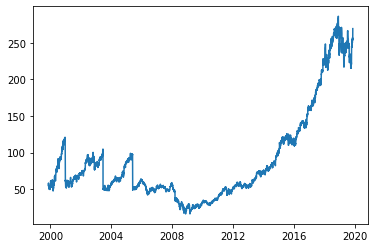

In [24]:
# Plot the 'Close' column to check if there is any irregularities in the data

plt.plot(unh_data.Close)

In [52]:
# Find the starting date, ending date and number of days of data

min_date = min(unh_data.index).date()
max_date = max(unh_data.index).date()
count_date = len(aapl_data.index)

In [51]:
# Print the results

print("The earliest date for the data is : " + str(min_date))
print("The latest date for the data is : " + str(max_date))
print("Number of days of transactions : " + str(count_date) + " days")

The earliest date for the data is : 1999-11-16
The latest date for the data is : 2019-11-15
Number of days of transactions : 5033 days


In [27]:
# Check the top stats measure

unh_data.describe()

,Open,High,Low,Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,89.383324,90.324080,88.428573,89.405332,6.917366e+06
std,63.475557,63.949237,62.909674,63.452234,4.541621e+06
min,16.570000,17.200000,14.511000,16.300000,7.440000e+05
25%,50.625000,51.250000,49.940000,50.630000,3.914800e+06
50%,63.700000,64.490000,63.030000,63.750000,5.775200e+06
75%,105.750000,107.625000,104.625000,106.125000,8.524000e+06
max,286.150000,287.940000,282.714000,286.330000,5.680120e+07


In [28]:
# Check for any missing data

unh_data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64